Objectives

- Analyze trends in child and infant mortality rates over the years.

- Investigate correlations between mortality rates and socioeconomic, healthcare, and environmental factors.

- Identify regions and countries with high mortality rates and uncover the contributing factors.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [3]:
#load the cleaned the datasets
df1_cleaned = pd.read_csv('df1_cleaned.csv')
df2_cleaned = pd.read_csv('df2_cleaned.csv')
df3_cleaned = pd.read_csv('df3_cleaned.csv')
df4_cleaned = pd.read_csv('df4_cleaned.csv')
df5_cleaned = pd.read_csv('df5_cleaned.csv')
df6_cleaned = pd.read_csv('df6_cleaned.csv')
df7_cleaned = pd.read_csv('df7_cleaned.csv')
df8_cleaned = pd.read_csv('df8_cleaned.csv')

Merging the datasets

-Merge the Datasets: Since we have 8 datasets, we will progressively merge them using pd.merge() with how='inner' and the key columns being Entity and Year.

In [5]:
# Start by merging the first two datasets
merged_df = pd.merge(df1_cleaned, df2_cleaned, how='inner', on=['entity', 'year'])

# Incrementally merge the remaining datasets
merged_df = pd.merge(merged_df, df3_cleaned, how='inner', on=['entity', 'year'])

df4_cleaned.rename(columns={'location': 'entity', 'period': 'year'}, inplace=True)
merged_df = pd.merge(merged_df, df4_cleaned, how='inner', on=['entity', 'year'])

merged_df = pd.merge(merged_df, df5_cleaned, how='inner', on=['entity', 'year'])
merged_df = pd.merge(merged_df, df6_cleaned, how='inner', on=['entity', 'year'])
merged_df = pd.merge(merged_df, df7_cleaned, how='inner', on=['entity', 'year'])
merged_df = pd.merge(merged_df, df8_cleaned, how='inner', on=['entity', 'year'])

In [6]:
# Display the merged dataframe
merged_df.head()

,entity,year,under-fifteen_mortality_rate,deaths_-_sex:_all_-_age:_0_-_variant:_estimates,observation_value_-_indicator:_under-five_mortality_rate_-_sex:_total_-_wealth_quintile:_total_-_unit_of_measure:_deaths_per_100_live_births,indicatorcode,indicator,valuetype,parentlocationcode,parentlocation,...,hib3_pct_of_one-year-olds_immunized,ipv1_pct_of_one-year-olds_immunized,mcv1_pct_of_one-year-olds_immunized,pcv3_pct_of_one-year-olds_immunized,pol3_pct_of_one-year-olds_immunized,rcv1_pct_of_one-year-olds_immunized,rotac_pct_of_one-year-olds_immunized,yfv_pct_of_one-year-olds_immunized,dtp3_pct_of_one-year-olds_immunized,share_of_population_covered_by_health_insurance_(ilo_(2014))
0,Antigua and Barbuda,2007,1.516073,13.0,1.267723,MORT_300,Distribution of causes of death among children...,numeric,AMR,Americas,...,99.0,94.0,99.0,87.0,98.0,99.0,80.0,60.0,99.0,51.1
1,Antigua and Barbuda,2007,1.516073,13.0,1.267723,MORT_300,Distribution of causes of death among children...,numeric,AMR,Americas,...,99.0,94.0,99.0,87.0,98.0,99.0,80.0,60.0,99.0,51.1
2,Antigua and Barbuda,2007,1.516073,13.0,1.267723,MORT_300,Distribution of causes of death among children...,numeric,AMR,Americas,...,99.0,94.0,99.0,87.0,98.0,99.0,80.0,60.0,99.0,51.1
3,Antigua and Barbuda,2007,1.516073,13.0,1.267723,MORT_300,Distribution of causes of death among children...,numeric,AMR,Americas,...,99.0,94.0,99.0,87.0,98.0,99.0,80.0,60.0,99.0,51.1
4,Antigua and Barbuda,2007,1.516073,13.0,1.267723,MORT_300,Distribution of causes of death among children...,numeric,AMR,Americas,...,99.0,94.0,99.0,87.0,98.0,99.0,80.0,60.0,99.0,51.1


In [7]:
#Inspect the resulting merged dataset
print(merged_df.shape)
print(merged_df.isnull().sum())

(3822, 32)
entity                                                                                                                                          0
year                                                                                                                                            0
under-fifteen_mortality_rate                                                                                                                    0
deaths_-_sex:_all_-_age:_0_-_variant:_estimates                                                                                                 0
observation_value_-_indicator:_under-five_mortality_rate_-_sex:_total_-_wealth_quintile:_total_-_unit_of_measure:_deaths_per_100_live_births    0
indicatorcode                                                                                                                                   0
indicator                                                                                                        

In [8]:
# Save the merged dataset to a CSV file
merged_df.to_csv('merged_cleaned_data.csv', index=False)

Exploratory data analysis (EDA)

In [10]:
#load the merged dataset
merged_df = pd.read_csv('merged_cleaned_data.csv')

In [11]:
# Display basic information
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3822 entries, 0 to 3821
Data columns (total 32 columns):
 #   Column                                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                                        --------------  -----  
 0   entity                                                                                                                                        3822 non-null   object 
 1   year                                                                                                                                          3822 non-null   int64  
 2   under-fifteen_mortality_rate                                                                                                                  3822 non-null   float64
 3   deaths_-_sex:_all_-_age:_0_-_vari

In [12]:
# Summary statistics for numerical columns
merged_df.describe()

,year,under-fifteen_mortality_rate,deaths_-_sex:_all_-_age:_0_-_variant:_estimates,observation_value_-_indicator:_under-five_mortality_rate_-_sex:_total_-_wealth_quintile:_total_-_unit_of_measure:_deaths_per_100_live_births,factvaluenumeric,value,estimated_maternal_deaths,births_attended_by_skilled_health_staff_(%_of_total),bcg_pct_of_one-year-olds_immunized,hepb3_pct_of_one-year-olds_immunized,hib3_pct_of_one-year-olds_immunized,ipv1_pct_of_one-year-olds_immunized,mcv1_pct_of_one-year-olds_immunized,pcv3_pct_of_one-year-olds_immunized,pol3_pct_of_one-year-olds_immunized,rcv1_pct_of_one-year-olds_immunized,rotac_pct_of_one-year-olds_immunized,yfv_pct_of_one-year-olds_immunized,dtp3_pct_of_one-year-olds_immunized,share_of_population_covered_by_health_insurance_(ilo_(2014))
count,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.0,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000
mean,2008.626374,3.315947,24851.461538,2.841950,0.071401,0.068707,1678.826405,88.028689,92.879121,87.285714,89.637363,94.0,89.725275,85.076923,90.549451,92.934066,79.736264,58.637363,90.582418,66.018681
std,2.246895,3.952648,85473.963774,3.443593,0.101937,0.106178,7819.952102,20.623001,8.690951,17.221132,14.429819,0.0,11.155787,11.476492,11.103639,6.699740,4.491935,13.612149,11.359850,38.311417
min,2001.000000,0.359207,11.000000,0.269074,0.000000,0.000000,0.146333,13.900000,41.000000,5.000000,0.000000,94.0,53.000000,22.000000,46.000000,62.000000,59.000000,0.000000,45.000000,0.000000
25%,2008.000000,0.766199,266.000000,0.612019,0.000000,0.000000,4.284802,85.640730,92.000000,87.000000,91.000000,94.0,88.000000,87.000000,88.000000,93.000000,80.000000,60.000000,87.000000,25.000000
50%,2009.000000,1.757432,1139.000000,1.453562,0.026000,0.000000,37.885525,98.500000,95.000000,93.000000,92.000000,94.0,94.000000,87.000000,95.000000,94.000000,80.000000,60.000000,95.000000,91.000000
75%,2010.000000,3.999793,8199.000000,3.561539,0.100000,0.100000,251.992000,99.800000,99.000000,96.000000,96.000000,94.0,97.000000,87.000000,98.000000,97.000000,80.000000,60.000000,98.000000,100.000000
max,2011.000000,19.723742,599574.000000,17.524014,0.660000,0.700000,71529.030000,100.000000,99.000000,99.000000,99.000000,94.0,99.000000,99.000000,99.000000,99.000000,97.000000,97.000000,99.000000,100.000000


In [13]:
# Define shorter column names
short_column_names = {
    'entity': 'Country',
    'year': 'Year',
    'under-fifteen_mortality_rate': 'U15_Mortality',
    'deaths_-_sex:_all_-_age:_0_-_variant:_estimates': 'Infant_Deaths',
    'observation_value_-_indicator:_under-five_mortality_rate_-_sex:_total_-_wealth_quintile:_total_-_unit_of_measure:_deaths_per_100_live_births': 'U5_Mortality_Rate',
    'indicatorcode': 'Indicator_Code',
    'indicator': 'Indicator',
    'valuetype': 'Value_Type',
    'parentlocationcode': 'Parent_Location_Code',
    'parentlocation': 'Parent_Location',
    'location_type': 'Location_Type',
    'spatialdimvaluecode': 'Spatial_Dim_Code',
    'period_type': 'Period_Type',
    'dim1_type': 'Dim1_Type',
    'dim2_type': 'Dim2_Type',
    'factvaluenumeric': 'Fact_Value_Num',
    'value': 'Value',
    'code': 'Code',
    'estimated_maternal_deaths': 'Maternal_Deaths',
    'births_attended_by_skilled_health_staff_(%_of_total)': 'Skilled_Birth_Attendance',
    'bcg_pct_of_one-year-olds_immunized': 'BCG_Immunized',
    'hepb3_pct_of_one-year-olds_immunized': 'HepB3_Immunized',
    'hib3_pct_of_one-year-olds_immunized': 'Hib3_Immunized',
    'ipv1_pct_of_one-year-olds_immunized': 'IPV1_Immunized',
    'mcv1_pct_of_one-year-olds_immunized': 'MCV1_Immunized',
    'pcv3_pct_of_one-year-olds_immunized': 'PCV3_Immunized',
    'pol3_pct_of_one-year-olds_immunized': 'Polio3_Immunized',
    'rcv1_pct_of_one-year-olds_immunized': 'RCV1_Immunized',
    'rotac_pct_of_one-year-olds_immunized': 'RotaC_Immunized',
    'yfv_pct_of_one-year-olds_immunized': 'YFV_Immunized',
    'dtp3_pct_of_one-year-olds_immunized': 'DTP3_Immunized',
    'share_of_population_covered_by_health_insurance_(ilo_(2014))': 'Health_Insurance_Coverage'
}

# Rename columns
merged_df.rename(columns=short_column_names, inplace=True)


In [14]:
# Unique countries and years
print("Unique Countries:", merged_df['Country'].nunique())
print("Year Range:", merged_df['Year'].min(), "-", merged_df['Year'].max())

Unique Countries: 91
Year Range: 2001 - 2011


Observation
The dataset covers 91 unique countries between the years 2001 and 2011.

Visualizations

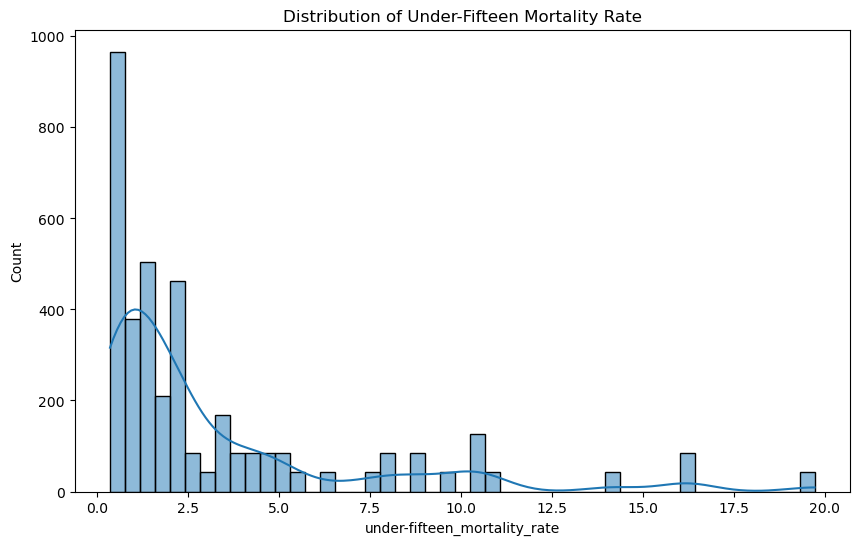

In [17]:
#Distribution of Mortality Rates

# Plot distribution for under-fifteen mortality rate
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['U15_Mortality'], kde=True)
plt.title('Distribution of Under-Fifteen Mortality Rate')
plt.xlabel('under-fifteen_mortality_rate')
plt.ylabel('Count')
plt.show()

Observation:

- The distribution is heavily right-skewed, with the majority of observations concentrated below a mortality rate of 5 deaths per 1,000 live   births.
- A small proportion of countries or regions experience extremely high under-15 mortality rates (e.g., above 15 deaths per 1,000).

In [19]:
#- Analyze trends in child and infant mortality rates over the years.
yearly_trends = merged_df.groupby('Year')[['U5_Mortality_Rate', 'Infant_Deaths']].mean()
print(yearly_trends)

      U5_Mortality_Rate  Infant_Deaths
Year                                  
2001           4.330797    6230.000000
2003           5.652626   90615.000000
2004           0.772904     299.000000
2005           1.759399    1355.333333
2006           3.298121    2360.000000
2007           2.856028    1866.800000
2008           6.203404   78530.555556
2009           3.421361   32356.285714
2010           2.060816   19630.821429
2011           0.576615    1030.692308


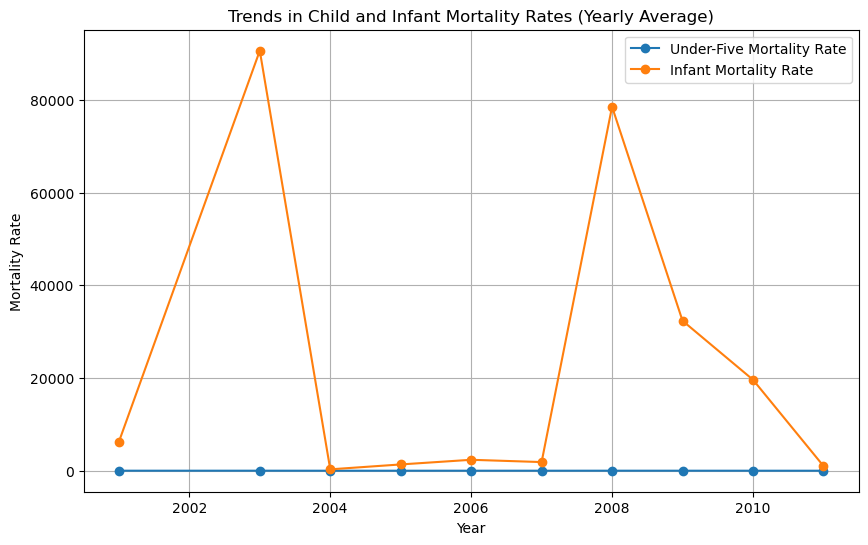

In [20]:
#- Analyze trends in child and infant mortality rates over the years.
# Group data by year and calculate mean mortality rates
yearly_trends = merged_df.groupby('Year')[['U5_Mortality_Rate', 'Infant_Deaths']].mean()

# Plotting trends
plt.figure(figsize=(10, 6))
plt.plot(yearly_trends.index, yearly_trends['U5_Mortality_Rate'], label='Under-Five Mortality Rate', marker='o')
plt.plot(yearly_trends.index, yearly_trends['Infant_Deaths'], label='Infant Mortality Rate', marker='o')
plt.title('Trends in Child and Infant Mortality Rates (Yearly Average)')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.legend()
plt.grid()
plt.show()

Observations

- Fluctuations in Under-Five Mortality Rate Peaks in 2003 (5.65) and 2008 (6.20) and Significant drops in 2004 (0.77) and 2011 (0.58).

- Infant Deaths show Sharp spikes in 2003 (90,615) and 2008 (78,531) and Gradual decline observed from 2009 to 2011.

In [22]:
#Analyze trends in under-fifteen mortality rate and under-five mortality rates over the years.
yearly_trends = merged_df.groupby('Year')[['U5_Mortality_Rate', 'U15_Mortality']].mean()
print(yearly_trends)

      U5_Mortality_Rate  U15_Mortality
Year                                  
2001           4.330797       4.766884
2003           5.652626       6.407997
2004           0.772904       0.916661
2005           1.759399       2.116732
2006           3.298121       3.853106
2007           2.856028       3.386801
2008           6.203404       7.180375
2009           3.421361       3.971249
2010           2.060816       2.442304
2011           0.576615       0.713057


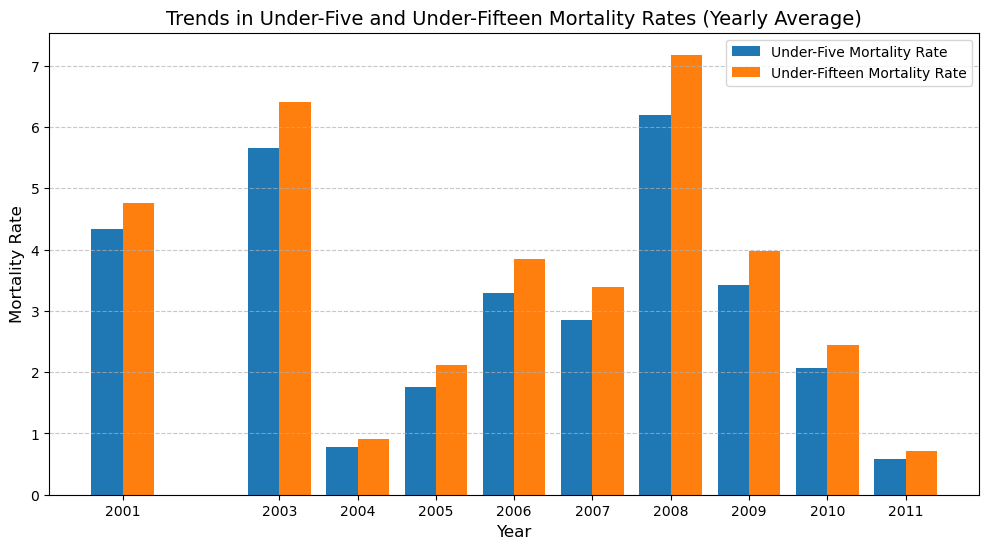

In [23]:
#Analyze trends in under-fifteen mortality rate and under-five mortality rates over the years.
# Group data by year and calculate mean mortality rates
yearly_trends = merged_df.groupby('Year')[['U5_Mortality_Rate', 'U15_Mortality']].mean()

# Plotting bar chart
plt.figure(figsize=(12, 6))

# Bar chart for under-five mortality
plt.bar(yearly_trends.index - 0.2, yearly_trends['U5_Mortality_Rate'], width=0.4, label='Under-Five Mortality Rate')

# Bar chart for infant mortality
plt.bar(yearly_trends.index + 0.2, yearly_trends['U15_Mortality'], width=0.4, label='Under-Fifteen Mortality Rate')

plt.title('Trends in Under-Five and Under-Fifteen Mortality Rates (Yearly Average)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mortality Rate', fontsize=12)
plt.xticks(yearly_trends.index)  # Set x-axis ticks as years
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observations

-  nder-Five5_Mortalit _Rate and nder-Fifteen _Mortality follow similar trends, indicating a strong relationship.- * Both metrics peak in 2003 and 2008, showing significant mortality rates during these years- ** Steady decline in both rates from 2009 to 2011, reflecting improving health outcome- :** The lowest rates are observed in 2004 and 2011.

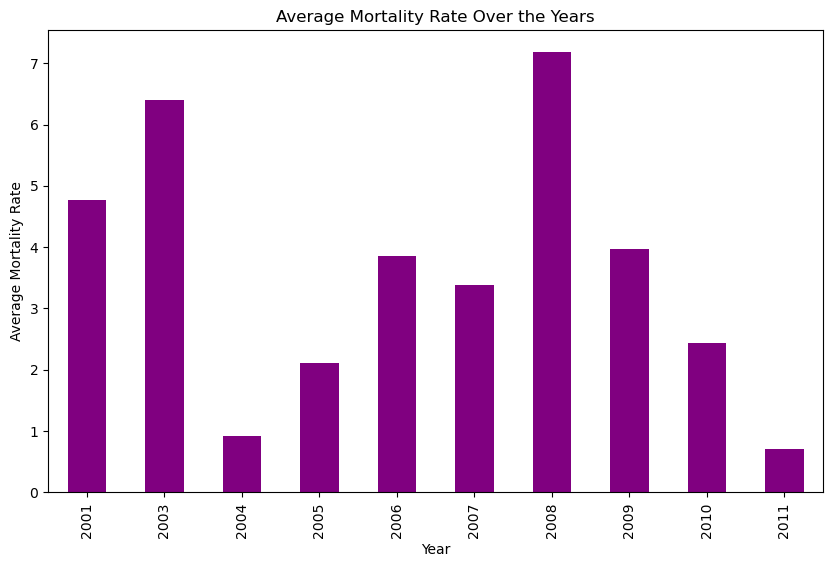

In [25]:
#Analyze how mortality rates have changed over the years
# Bar chart for average mortality rate over the years
plt.figure(figsize=(10, 6))
avg_mortality_by_year = merged_df.groupby('Year')['U15_Mortality'].mean()
avg_mortality_by_year.plot(kind='bar', title='Average Mortality Rate Over the Years', color='purple')
plt.ylabel('Average Mortality Rate')
plt.xlabel('Year')
plt.show()

Observation:

- There is an inconsistent trend in the average mortality rate over time, with some years showing sharp increases (e.g., 2003, 2008) and       others showing declines (e.g., 2004, 2010).
- The average mortality rate has generally declined toward the later years of the timeline (e.g., 2011 shows the lowest value).

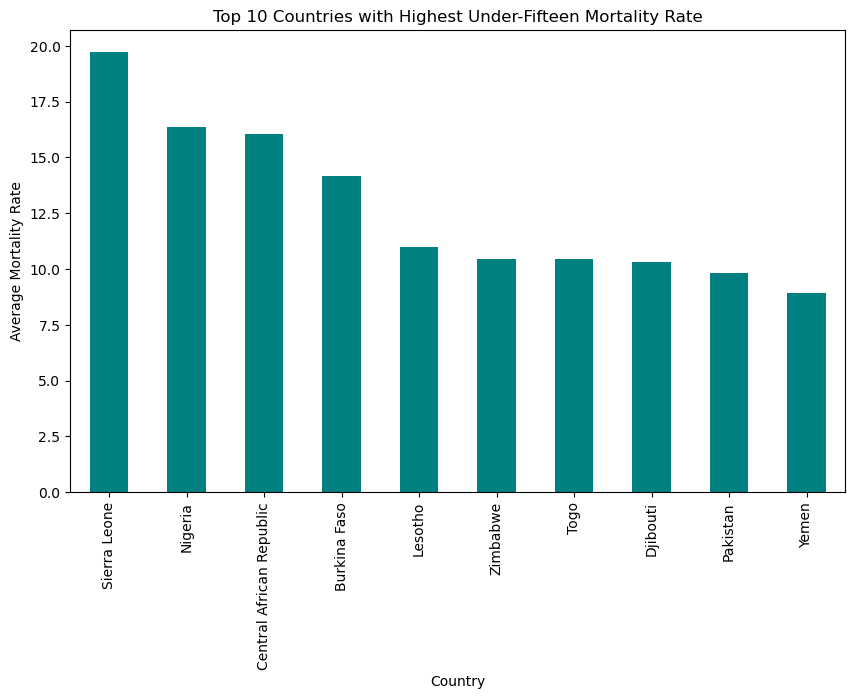

In [27]:
# Top countries with the highest under fifteen mortality rates
plt.figure(figsize=(10, 6))
top_countries = merged_df.groupby('Country')['U15_Mortality'].mean().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', title='Top 10 Countries with Highest Under-Fifteen Mortality Rate', color='teal')
plt.ylabel('Average Mortality Rate')
plt.xlabel('Country')
plt.show()

Observation:
- Sierra Leone, Nigeria, and Central African Republic exhibit the highest under-fifteen mortality rates, with Sierra Leone topping the list.

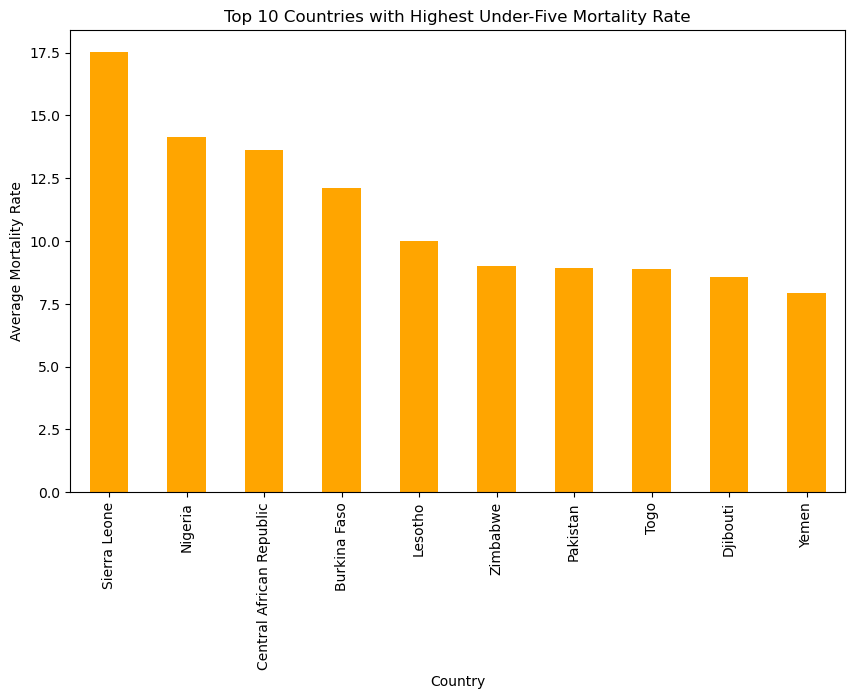

In [29]:
# Top 10 countries with the highest under five mortality rates

plt.figure(figsize=(10, 6))
top_countries = merged_df.groupby('Country')['U5_Mortality_Rate'].mean().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', title='Top 10 Countries with Highest Under-Five Mortality Rate', color='orange')
plt.ylabel('Average Mortality Rate')
plt.xlabel('Country')
plt.show()

Observation:
- Countries like Sierra Leone, Nigeria, and Central African Republic exhibit the highest under-five mortality rates, with Sierra Leone         topping the list.
- This indicates a severe child mortality crisis in these countries.

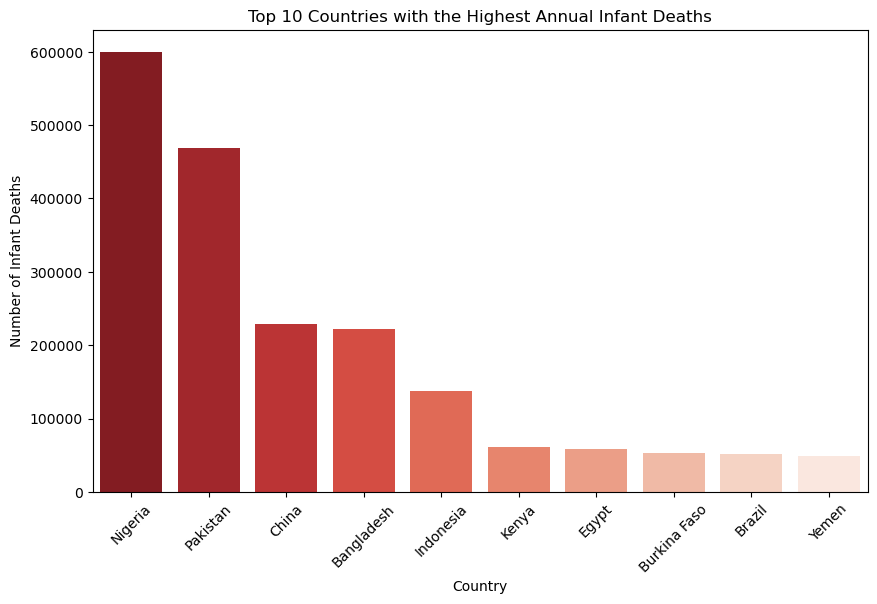

In [31]:
# Bar plot for top 10 countries with the highest infant deaths
top_infant_deaths = merged_df.groupby('Country')['Infant_Deaths'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_infant_deaths.index, y=top_infant_deaths.values, palette="Reds_r")
plt.title("Top 10 Countries with the Highest Annual Infant Deaths")
plt.xlabel("Country")
plt.ylabel("Number of Infant Deaths")
plt.xticks(rotation=45)
plt.show()

Observation:
- Nigeria leads with the highest infant deaths, followed by Bangladesh and Pakistan.

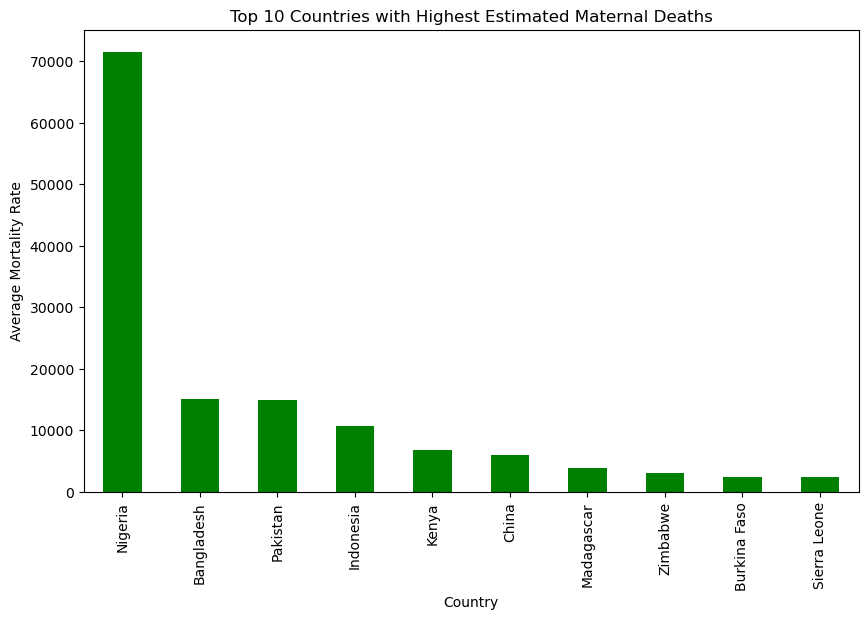

In [33]:
# Top 10 countries with the highest estimated maternal deaths

plt.figure(figsize=(10, 6))
top_countries = merged_df.groupby('Country')['Maternal_Deaths'].mean().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', title='Top 10 Countries with Highest Estimated Maternal Deaths', color='green')
plt.ylabel('Average Mortality Rate')
plt.xlabel('Country')
plt.show()

Observation
- Nigeria leads with the highest maternal deaths, followed by Bangladesh and Pakistan.
- Sub-Saharan Africa dominates the list, highlighting regional healthcare challenges.
- China has notable maternal deaths, likely due to its large population.

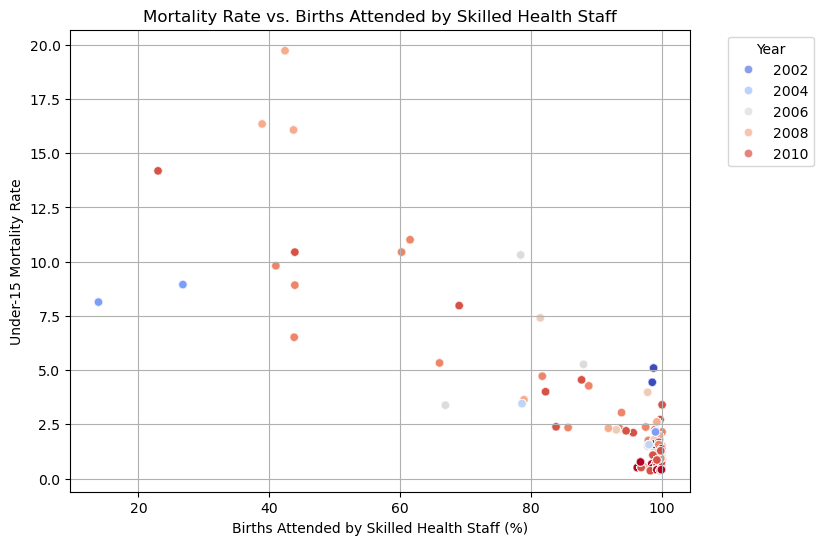

In [35]:
#Mortality Rate vs. Births Attended by Skilled Health Staff

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=merged_df, 
    x='Skilled_Birth_Attendance', 
    y='U15_Mortality', 
    hue='Year', 
    palette="coolwarm", 
    alpha=0.7
)
plt.title("Mortality Rate vs. Births Attended by Skilled Health Staff")
plt.xlabel("Births Attended by Skilled Health Staff (%)")
plt.ylabel("Under-15 Mortality Rate")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

Observation:
- There is a clear inverse relationship between the percentage of births attended by skilled health staff and under-15 mortality rates.
- Countries or regions with higher rates of skilled birth attendance tend to have significantly lower under-15 mortality rates.
- Over the years (2002–2010), improvements in skilled birth attendance are evident, especially as data points concentrate toward higher        percentages and lower mortality rates.

Key Factors Contributing to High Mortality Rates

In [38]:
# Focusing on factors most correlated with under-fifteen mortality

# Select numeric columns
numeric_df = merged_df.select_dtypes(include=[np.number])

# Compute correlations
correlation_matrix = numeric_df.corr()

mortality_correlation = correlation_matrix['U15_Mortality'].sort_values(ascending=False)
print("Top correlations with under-fifteen mortality rate:")
print(mortality_correlation.head(10))

print("\nLowest correlations with under-fifteen mortality rate:")
print(mortality_correlation.tail(10))

Top correlations with under-fifteen mortality rate:
U15_Mortality        1.000000
U5_Mortality_Rate    0.999014
Maternal_Deaths      0.456990
Infant_Deaths        0.452806
PCV3_Immunized       0.105671
YFV_Immunized        0.067797
RotaC_Immunized      0.030170
Fact_Value_Num      -0.000344
Value               -0.007710
RCV1_Immunized      -0.023255
Name: U15_Mortality, dtype: float64

Lowest correlations with under-fifteen mortality rate:
Hib3_Immunized              -0.105874
Year                        -0.234882
BCG_Immunized               -0.308407
HepB3_Immunized             -0.350596
DTP3_Immunized              -0.621747
Polio3_Immunized            -0.637594
Health_Insurance_Coverage   -0.676380
MCV1_Immunized              -0.682608
Skilled_Birth_Attendance    -0.857055
IPV1_Immunized                    NaN
Name: U15_Mortality, dtype: float64


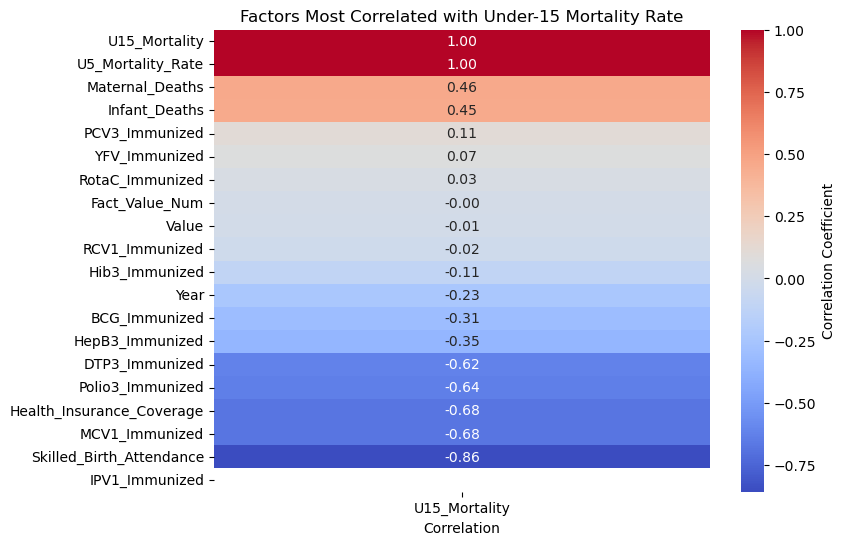

In [39]:
# Top 10 and bottom 10 correlations
top_corr = mortality_correlation.head(10)
low_corr = mortality_correlation.tail(10)

# Combine top and lowest correlations
selected_corr = pd.concat([top_corr, low_corr])

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(selected_corr.to_frame(), annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Factors Most Correlated with Under-15 Mortality Rate")
plt.xlabel("Correlation")
plt.yticks(rotation=0)
plt.show()

Key Observations

1. Top Correlations with Under-Fifteen Mortality Rate
- Strong Positive Correlation with Under-Five Mortality Rate (1.00):
   This near-perfect correlation highlights a shared underlying dynamic influencing both under-five mortalityrate and under-fifteen             mortality rates.It suggests that factors driving child mortality under five also heavily impact older children up to fifteen.
   
- Moderate Positive Correlation with Maternal Deaths (0.46) and Infant Deaths (0.45):
   Higher maternal and infant mortality are moderately associated with higher under-fifteen mortality, reflecting the broader impact of         maternal health and early-life care quality on child survival.
   
- Weak Positive Correlation with PCV3 (0.11), YFV (0.07), and RotaC Immunization (0.03):
   Although positively correlated, these immunization rates show limited direct association with under-fifteen mortality. However, this may     indicate a lag effect or influence in areas with otherwise higher mortality rates.


2. Lowest Correlations with Under-Fifteen Mortality Rate
- Negative Correlation with Skilled Birth Attendance (-0.86):
   This strong negative correlation underscores the critical role of skilled healthcare in improving child survival. Higher rates of skilled    birth attendance correlate with lower under-fifteen mortality.

- Negative Correlation with Health Insurance Coverage (-0.68):
   Access to health insurance is associated with reduced under-fifteen mortality, emphasizing the importance of healthcare accessibility.

- Negative Correlation with Immunization Rates (e.g., MCV1, Polio3, DTP3):
   High immunization rates correspond to reduced child mortality, highlighting vaccination programs as a key intervention strategy.
   Negative Correlation with Year (-0.234882):
   This weak trend suggests declining under-fifteen mortality rates over time, reflecting global efforts in health and development.


Distribution of Healthcare Coverage across countries

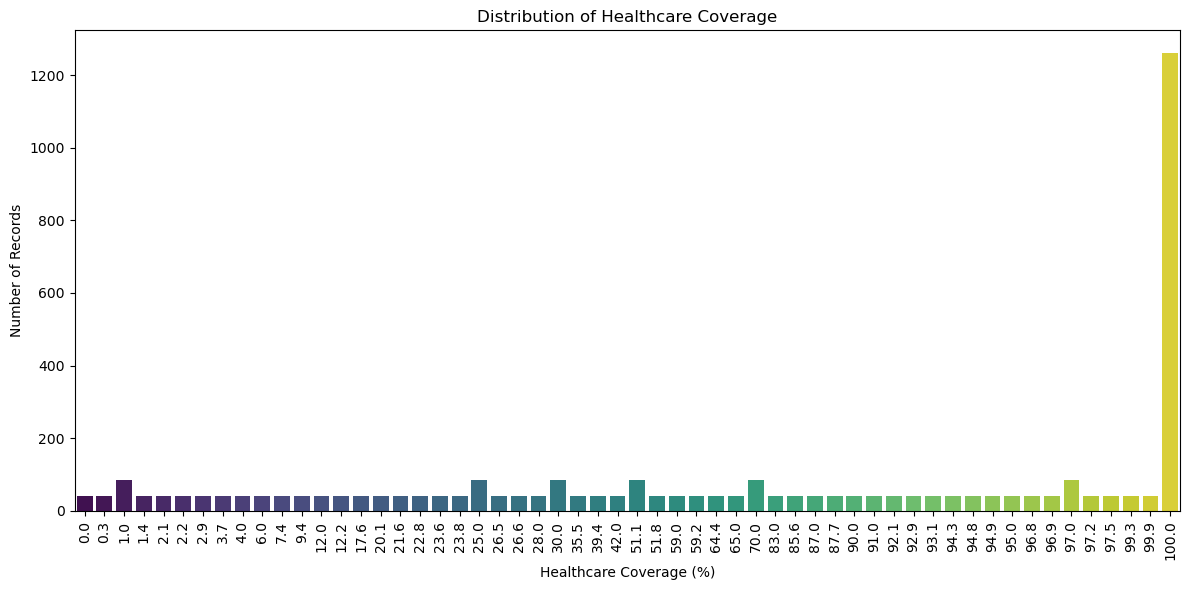

In [42]:
# Bar plot for healthcare coverage distribution
plt.figure(figsize=(12, 6))
coverage_data = merged_df['Health_Insurance_Coverage'].value_counts()
sns.barplot(x=coverage_data.index, y=coverage_data.values, palette="viridis")
plt.title("Distribution of Healthcare Coverage")
plt.xlabel("Healthcare Coverage (%)")
plt.ylabel("Number of Records")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Observation
- Most countries in the dataset report full health insurance coverage, which might correlate with better health outcomes.
- Many countries have partial or no health insurance coverage, possibly correlating with higher mortality rates.

Insight

While some countries achieve universal healthcare, a substantial number of regions still lag, particularly in developing countries. This disparity likely drives global health inequities, including child mortality.

In [45]:
# Extracting top 10 and bottom 10 countries by healthcare coverage
# Group by 'Country' and take the average healthcare coverage for unique values
coverage_by_country = merged_df.groupby('Country')['Health_Insurance_Coverage'].mean().reset_index()

# Sort for highest and lowest percentages
top_countries = coverage_by_country.sort_values(by='Health_Insurance_Coverage', ascending=False).head(10)
bottom_countries = coverage_by_country.sort_values(by='Health_Insurance_Coverage', ascending=True).head(10)


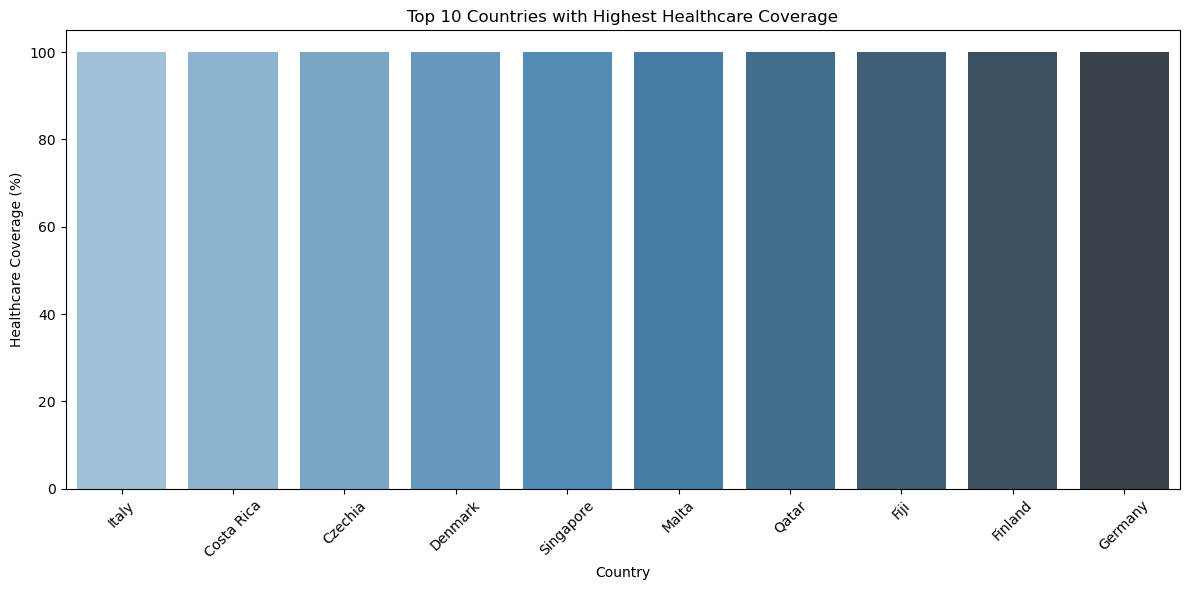

In [46]:
# Bar plot for top 10 countries with the highest healthcare coverage
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='Country', y='Health_Insurance_Coverage', palette="Blues_d")
plt.title("Top 10 Countries with Highest Healthcare Coverage")
plt.xlabel("Country")
plt.ylabel("Healthcare Coverage (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observation

- Countries like Italy, Costa Rica, Czechia, Denmark, and Germany have 100% healthcare coverage.
- These countries represent regions where access to healthcare is universal or nearly universal.
- Healthcare systems in these regions are likely robust, with high levels of immunization, skilled birth attendance, and maternal care.

Insight

There is a clear correlation between high healthcare coverage and reduced mortality rates. Countries with strong healthcare systems are able to offer critical services that prevent deaths, especially among children under 15 years of age.

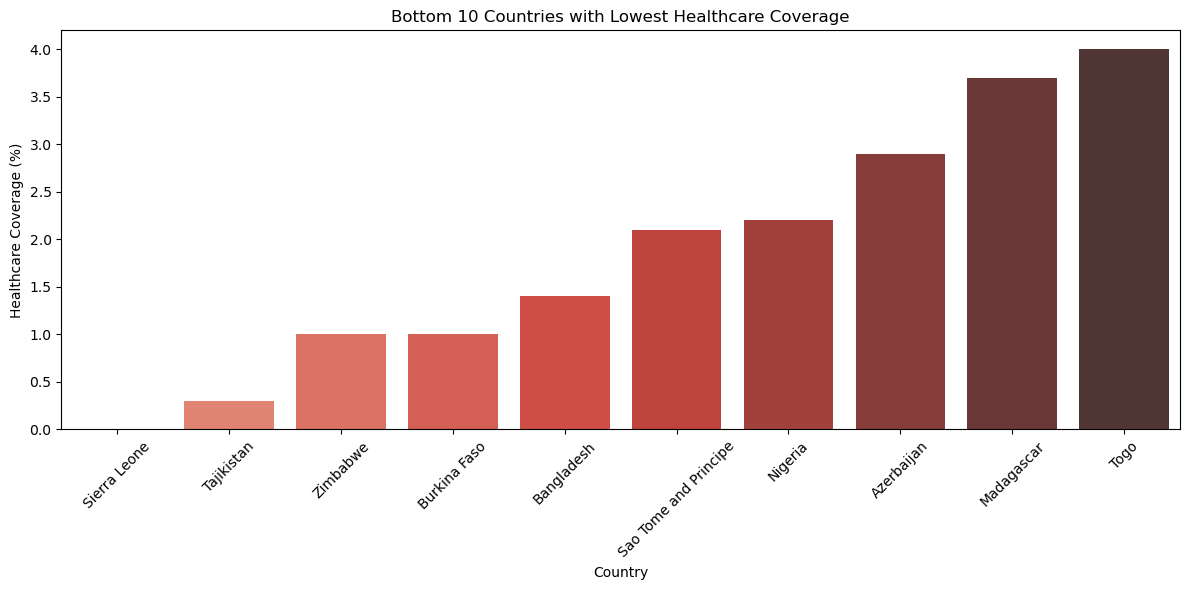

In [49]:
# Bar plot for bottom 10 countries with the lowest healthcare coverage
plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_countries, x='Country', y='Health_Insurance_Coverage', palette="Reds_d")
plt.title("Bottom 10 Countries with Lowest Healthcare Coverage")
plt.xlabel("Country")
plt.ylabel("Healthcare Coverage (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observation

- Countries like Sierra Leone, Tajikistan, and Zimbabwe have the lowest healthcare coverage percentages, with Sierra Leone at the very         bottom.
- The healthcare coverage in these countries ranges from near 0% to around 4%.
- This indicates a critical lack of access to healthcare services in these regions, which could directly contribute to high mortality rates.

Insight

Countries with minimal healthcare coverage are likely to face challenges in reducing child and maternal mortality due to limited access to essential medical services, vaccinations, and skilled health professionals.

Conclusion and Recommendations

The analysis revealed that regions with limited healthcare access and low immunization rates face higher child and infant mortality.

Recommendations include:

- Increasing investments in healthcare infrastructure.

- Enhancing immunization coverage.

- Promoting policies to improve skilled birth attendance.